## Import libraries

In [342]:
!pip install openpyxl plotly -q


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [343]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set_theme()
import plotly.figure_factory as ff
from itertools import combinations
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [344]:
Customers_data = pd.read_excel('AdventureWorks_Database.xlsx',
                              'Customers',
                              dtype={'CustomerKey':str},
                              parse_dates=['BirthDate','DateFirstPurchase']
                              )

In [345]:
Product_data = pd.read_excel('AdventureWorks_Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )

In [346]:
Sales_data = pd.read_excel('AdventureWorks_Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)

In [347]:
Territory_data = pd.read_excel('AdventureWorks_Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [348]:
temp_data = pd.merge(Sales_data, Product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [350]:
# Check shape of the data after merging
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]} \n")

Number of Rows: 58189
Number of Columns: 58 



In [351]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesOrderLineNumber,58189.0,1.887453,1.018829,1.0000,1.0000,2.0000,2.0000,8.0000
OrderQuantity,58189.0,1.569386,1.047532,1.0000,1.0000,1.0000,2.0000,4.0000
UnitPrice,58189.0,413.888218,833.052938,0.5725,4.9900,24.4900,269.9950,3578.2700
TotalProductCost,58189.0,296.539185,560.171436,0.8565,3.3623,12.1924,343.6496,2171.2942
SalesAmount,58189.0,503.666270,941.462817,2.2900,8.9900,32.6000,539.9900,3578.2700
TaxAmt,58189.0,40.293303,75.317027,0.1832,0.7192,2.6080,43.1992,286.2616
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,58189.0,503.666269,941.462815,2.2900,8.9900,32.6000,539.9900,3578.2700
Unnamed: 16,58189.0,0.000001,0.000014,0.0000,0.0000,0.0000,0.0000,0.0003


In [352]:
# Check for duplicate data
df.duplicated().sum()

0

In [353]:
def missing_pct(df):
    # Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(columns={'index':'Column',0:'Missing_Percentage (%)'})
    
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(columns={'index':'Column',0:'Missing_value_count'})

    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final


In [354]:
# Applying the custom function
missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
22,Unnamed: 22,58189,100.00
19,Unnamed: 19,58189,100.00
14,Unnamed: 14,58189,100.00
13,Unnamed: 13,58189,100.00
17,Unnamed: 17,58189,100.00
30,Color,27442,47.16
0,ProductKey,0,0.00
42,MaritalStatus,0,0.00
41,BirthDate,0,0.00
39,LastName,0,0.00


In [355]:
#  Drop columns with nan values
df= df.dropna(axis=1)

In [356]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit 
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

In [357]:
df['Category'].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [358]:
df['SubCategory'].unique()

array(['Road Bikes', 'Mountain Bikes', 'Bottles and Cages', 'Gloves',
       'Tires and Tubes', 'Helmets', 'Touring Bikes', 'Jerseys',
       'Cleaners', 'Caps', 'Hydration Packs', 'Socks', 'Fenders', 'Vests',
       'Bike Racks', 'Bike Stands', 'Shorts'], dtype=object)

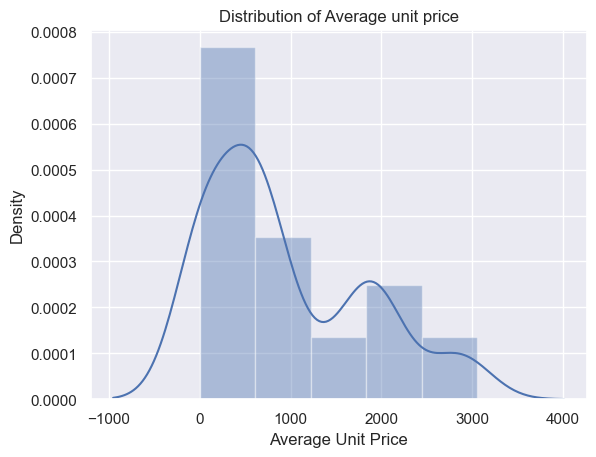

In [359]:
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True)
ax.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

- Maximum of the product unit price is below $1000

In [360]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


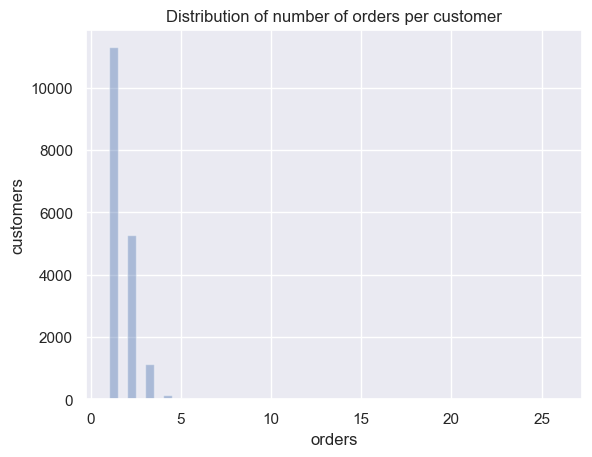

In [361]:
ax = sns.distplot(n_orders, kde=False)
ax.set(title='Distribution of number of orders per customer',
       xlabel='orders',
       ylabel='customers');

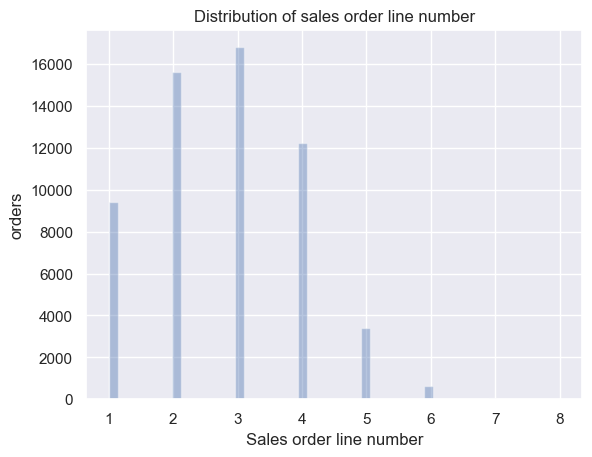

In [362]:
n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')
ax = sns.distplot(n_salesordernumber, kde=False)
ax.set(title='Distribution of sales order line number',
       xlabel='Sales order line number',
       ylabel='orders');

- Most of the time **three to two** products are ordered in a single order

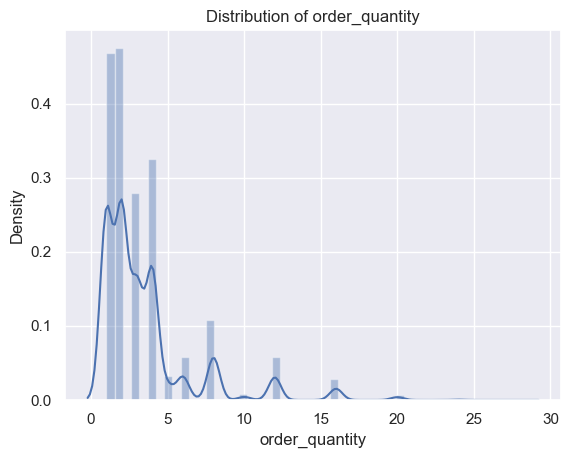

In [363]:
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True)
ax.set(title='Distribution of order_quantity',
       xlabel='order_quantity',
       );

- maximum quantity ordered for a product is below 5

#### Age Distribution




In [364]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count')
fig.show()

- A sizable portion of the clientele is made up of people between the ages of **40 and 59**.

#### Year wise sales 

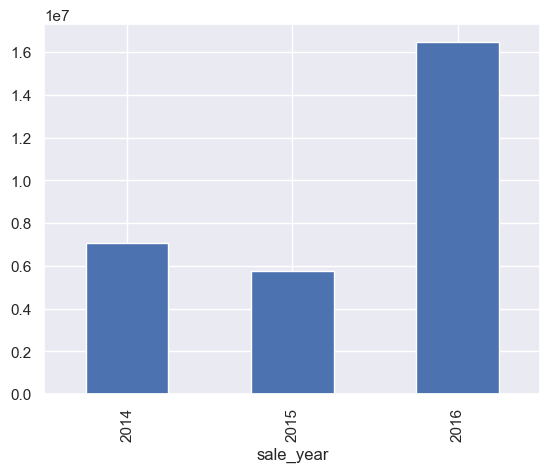

In [365]:
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar');

- The year 2016 saw an exponential surge in sales

#### Top 5 Selling Product

In [366]:
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

In [367]:
top_selling_product.reset_index(inplace=True)
fig = px.bar(top_selling_product, x='ProductName', y='OrderQuantity')
fig.show()

#### Quantity ordered based on category and subcategory from 2014 to 2016

In [368]:
sub_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
sub_qty = sub_qty.sort_values(['sale_year', 'Category'], ascending=True)
sub_qty.style.bar(subset=['OrderQuantity'])

#### Country wise quantity ordered 

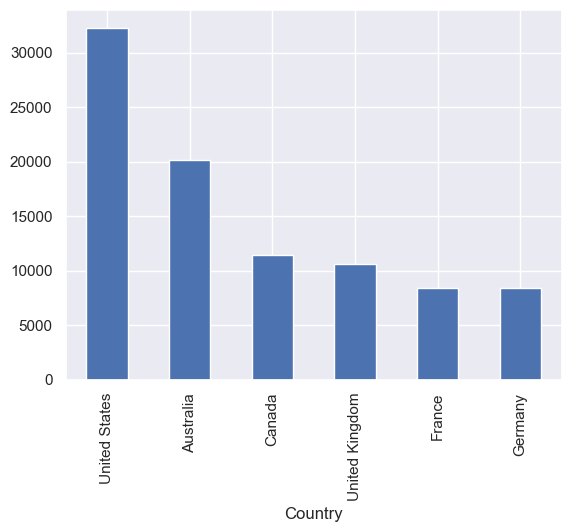

In [369]:
country_sales_qty = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_sales_qty.plot(kind='bar');

- High quantity of products is ordered from **Australia and United States**

In [370]:
sub_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
sub_profit = sub_profit.sort_values(['sale_year', 'Category'], ascending=True)
sub_profit.style.bar(subset=['profit'])

- Major Profit is contributed by the Bike Category

#### Low profit contributing product

In [371]:
 df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

#### Profitability by country

In [372]:
country_sales = pd.DataFrame(df.groupby('Country').sum()[['SalesAmount', 'profit']])
country_sales.reset_index(inplace=True)

fig = px.bar(country_sales, x='Country', y='profit',text_auto='.2s',height=400)
fig.show()

- High volume of profit is earned from **Australia and United States**

### Question and Answers

#### Q1. How efficient are the logistics? 

In [373]:
# Adding manufacturing days to the order received date
df['OrderreadyDate'] = df['OrderDate'] + pd.to_timedelta(df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
df['shipping_efficiency'] = (df['ShipDate'] - df['OrderreadyDate']).dt.days

fig = px.histogram(df, x="shipping_efficiency")
fig.show()

- The average order has a gap of 7 days between the day the order is ready for export from the factory and the date it was shipped
- Management must work to reduce this gap toward 3 days.

#### Q2. What was the best month for sales? How much was earned that month ?

In [374]:
month_sales = df.groupby('sale_month').sum()[['SalesAmount', 'profit']]
month_sales.reset_index(inplace=True)
fig = px.bar(month_sales, x='sale_month', y='SalesAmount',text_auto='.2s',
             hover_data=['sale_month', 'SalesAmount'], color='profit',
             height=400)
fig.show()

- There are large profit transactions in the months of **June, November, and December**

#### Q3. What time should we display advertisement to maximize likelihood of customerls buying product?

- High sales orders are seen on **Wednesday and Saturday**, therefore we can promote our product during these workweek

#### Q4. Which products are most often sold together?

In [375]:
# By setting keep on False, all duplicates are True since we only want repeated order number
dup_order = df[df['SalesOrderNumber'].duplicated(keep=False)]

In [376]:
# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
dup_order['grouped'] = df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

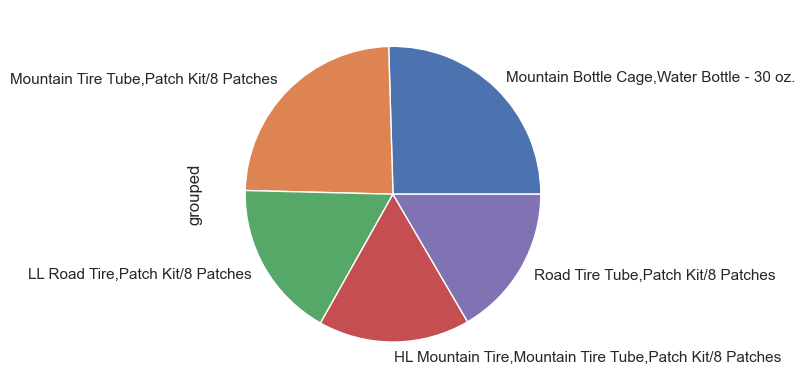

In [377]:
count = dup_order['grouped'].value_counts()[0:5].plot.pie()

- From the above pie diagram we can draw a conclusion that these products are mostly Purchased together

In [378]:
count = Counter()

for row in dup_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1623
('Road Bottle Cage', 'Water Bottle - 30 oz.') 1513
('HL Mountain Tire', 'Mountain Tire Tube') 915
('Touring Tire', 'Touring Tire Tube') 758
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Mountain Tire Tube', 'ML Mountain Tire') 727
('Water Bottle - 30 oz.', 'AWC Logo Cap') 599
('Road Tire Tube', 'ML Road Tire') 580
('Road Tire Tube', 'Patch Kit/8 Patches') 556
('HL Road Tire', 'Road Tire Tube') 552


- The above product can be sold in a bundle or a combined package for discount

#### Q5. Which product sold the most? why do you think it sold the most?

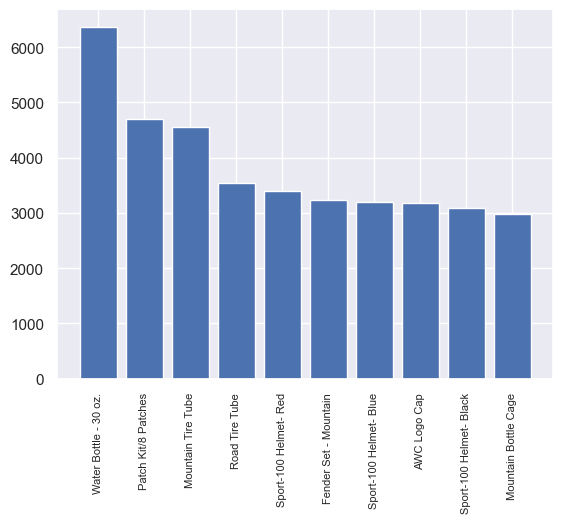

In [379]:
product_group = df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [380]:
prices = df.groupby('ProductName').mean()['UnitPrice']
prices = prices[products]

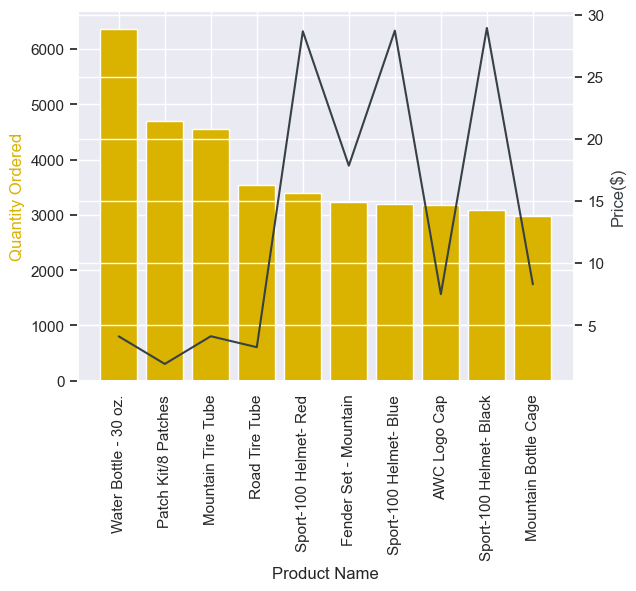

In [381]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#D9B300')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#D9B300')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

In [382]:
prices.corr(quantity_ordered)

-0.5333019792658484

- There is a **high negative correlation** between **Price and number of Quantity ordered**
- we can conclude that **low price product has high demand**

#### Q6. Compare most ordered product by gender

In [383]:
male = df[df["Gender"]=="M"]
female = df[df["Gender"]=="F"]

In [384]:
male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

In [385]:
fig = px.line(df_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

#### Q7. Does Gender and home ownership matter in order purchasing

In [386]:
fig = px.imshow(df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

- It's interesting to note that the average amount spent by men without permanent addresses is low, whilst the average amount spent by women without permanent addresses is higher. 

#### Q8. Number of childer and Purchase correlation

In [387]:
df_1 = df.groupby(["NumberChildrenAtHome"])["SalesAmount"].mean().to_frame()
df_1.reset_index(inplace=True)
fig = px.bar(df_1, x='NumberChildrenAtHome', y='SalesAmount')
fig.show()

#### Q9. Education, Occupation and Purchase correlation

In [388]:
fig = px.imshow(df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()


#### Q10. Maritial Status single and above 50 age purchase

In [389]:
df_2 = df[(df['MaritalStatus']=='S')&(df['Age']>50)]

In [390]:
df_2 = df_2.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_2.reset_index(inplace=True)
fig = px.bar(df_2, x='agerange', y='SalesAmount')
fig.show()

#### Q11. Which age group has produced the most revenue?

In [391]:
df_3 = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_3.reset_index(inplace=True)
fig = px.bar(df_3, x='agerange', y='SalesAmount')
fig.show()

####  Q12. Yearly income range and purchase correlation

In [392]:
def create_bins(lower_bound, width, quantity):
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [393]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

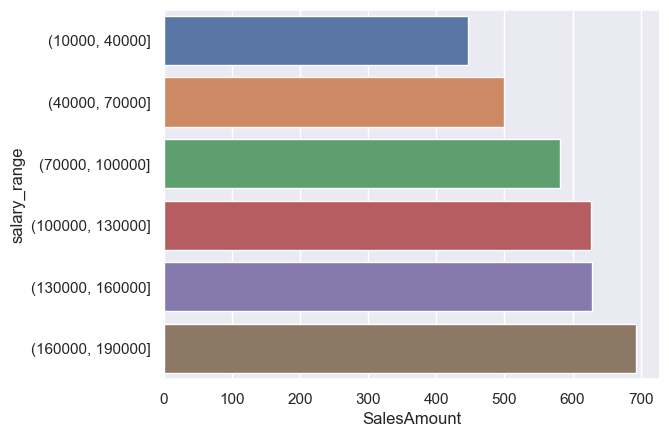

In [394]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4);

- High salary range leads to increase in purchase

#### Q13. Paritial high school vs bachlors income mean and most ordered product

In [395]:
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()

In [396]:
df_6.reset_index(inplace=True)
fig = px.bar(df_6, x='Education', y='YearlyIncome')
fig.show()

In [397]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
fig = px.bar(df_7, x="Education",
             y="OrderQuantity", color="ProductName",
             title="Paritial high school vs bachlors expense analysis",
             barmode="group")
fig.show()

- Customers with a **high school diploma and modest annual income buy more products** than people with bachelor's degrees

### Customer Segmentation 

In [398]:
#  calculating recency for customers who had made a purchase with a company

df_recency = df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

In [399]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.


frequency_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']


In [400]:
monetary_df = df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']


In [401]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')


In [402]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 

In [403]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)


In [404]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))


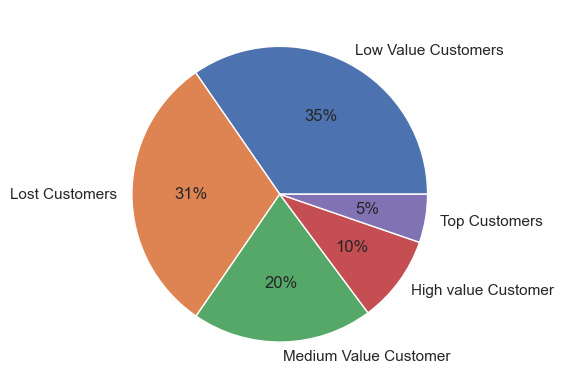

In [405]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

- According to the customer segmentation described above, approximately **15% of our clients are high value clients**, whereas the **majority of our clientele are low value and lost clients**